# Cesar Course

This notebook is synthesizing what I have learned regarding _machine learning_ during the Spring of 2023.\
Topics include:
* Linear Regression
- Gradient Descent

In [28]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)  #for reproducibility

#synthetic data in shape of Sine wave with noise
n = 15
x = np.linspace(0, 2*np.pi, n).reshape(-1,1)
t = np.sin(x)+np.random.randn(len(x),1)*0.3;

---
### Linear Regression

_fill in brief notes about the intuition and concept_

_So our equation would be:_
$$
\begin{gather}
\overline{w} = X^{\dag}t\\
\text{where the $size(t)$ is $(n \times 1)$, $size(X)$ is $(n \times (p+1))$, and $size(\overline{w})$ will be $((p+1) \times 1)$;}\\
\text{$n$ is the number of observations, and $p$ is the number of features}
\end{gather}
$$

[//]: # "- is the dagger (†) the correct representation of a pseudo-inverse?
         - is {\dag} reproduciable accross platforms? (it isn't in Google Collab)
         - the $$ delimiter creates a LaTeX math block https://github.blog/changelog/2022-05-19-render-mathematical-expressions-in-markdown/#:~:text=You%20can%20now%20use%20LaTeX%20style%20syntax%20to,delimit%20the%20expression%20with%20two%20dollar%20symbols%20%24%24
         - we say (p+1) because the extra 1 is the bias
         - Note that X^† has the same dimension as the transpose of X
         - X is the design matrix (see: phi, the kernel/bias function)"

In [29]:
X = np.c_[x**4, x**3, x**2, x, np.ones((len(x), 1))]  #in this example, I chose the design matrix to be 4 features (up to x^4)
print("In this example, dimensions of X are:", X.shape)
W = (np.linalg.pinv(X)).dot(t)
print("and, therefore, the dimensions of W are:", W.shape);

In this example, dimensions of X are: (15, 5)
and, therefore, the dimensions of W are: (5, 1)


the result could then be displayed as the regressed line(?) as follows:

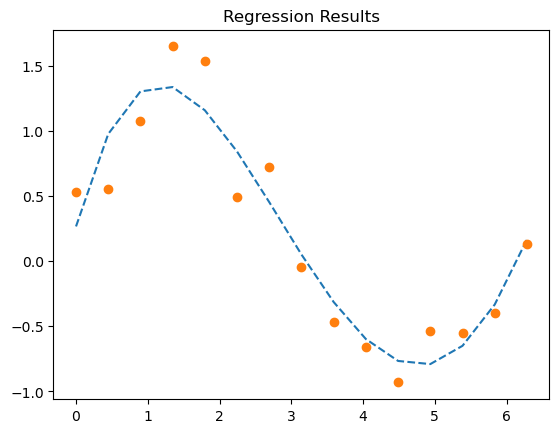

In [30]:
y1 = X@W

plt.title('Regression Results')
plt.plot(x,y1, '--')
plt.plot(x,y, 'o');

---
### Gradient Descent

_So our equation would be:_
$$
\begin{gather}
\nabla_\overline{w}{J(\overline{w})} = X^T(X\overline{w} - t)
\end{gather}
$$
_where the $size(\nabla_\overline{w}{J(\overline{w})})$ will equal the $size(\overline{w})$ to allow us to iteratively update the weights using the equation:_
$$
\begin{gather}
\overline{w}(i+1) := \overline{w}(i) - \eta \nabla_w{J(\overline{w}(i))}
\end{gather}
$$

[//]: # "- is it correct to say that the inputs are all matrices, including W? Or is W never a matrix, and always a vector?"

In [31]:
def gradient_vector(design_matrix, targets, weight_vector):
    return np.transpose(design_matrix)@(design_matrix@weight_vector - targets)

print(gradient_vector(X, t, W))


[[ 3.87608615e-13]
 [ 2.74590030e-13]
 [ 8.38756082e-14]
 [ 2.10491553e-14]
 [-1.47937218e-14]]


In [ ]:
# back propagation
def back_propagation(gradient,
